Captioning foods.jpg with model1:


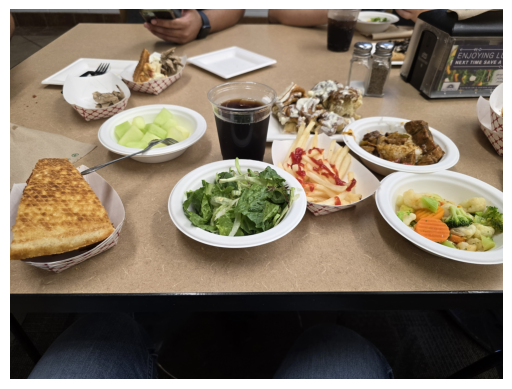

[{'generated_text': 'a table topped with plates of food and drinks '}]
Captioning legoP.jpg with model2:


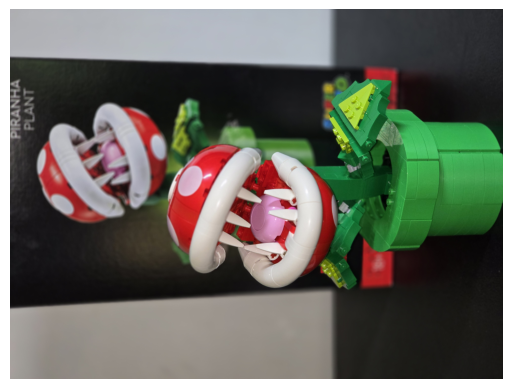

[{'generated_text': 'a toy with a mushroom on top of it'}]
Captioning proteinS.jpg with model3:


config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

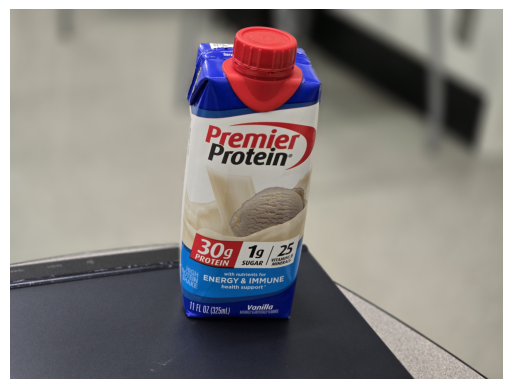

[{'generated_text': 'the top of a bottle of brand'}]


In [ ]:
import warnings
from transformers import pipeline
from transformers.utils import logging
from PIL import Image
import matplotlib.pyplot as plt
import os

!pip install transformers
!pip install pillow

warnings.filterwarnings(action='ignore')
logging.set_verbosity(40)

models = {
    "model1": "nlpconnect/vit-gpt2-image-captioning",
    "model2": "Salesforce/blip-image-captioning-base",
    "model3": "microsoft/git-base-coco"
}

def caption_image(image_path, model_name):
    try:
        if model_name not in models:
            print(f"Error: Model '{model_name}' not found in the available models.")
            return None

        captioner = pipeline(task="image-to-text", model=models[model_name], device=0 if 'CUDA' in str(next(iter(models.values()))) else -1) # Use GPU if available

        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        caption = captioner(image)
        return caption
    except FileNotFoundError:
        print(f"Error: Image file '{image_path}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

image_files = ["foods.jpg", "legoP.jpg", "proteinS.jpg"]

image_models = {
    "foods.jpg": "model1",
    "legoP.jpg": "model2",
    "proteinS.jpg": "model3"
}

for image_file in image_files:
    if os.path.exists(image_file):
        model_name = image_models.get(image_file, "model1")
        print(f"Captioning {image_file} with {model_name}:")
        caption = caption_image(image_file, model_name)
        if caption:
            print(caption)
    else:
        print(f"Error: Image file '{image_file}' not found. Please upload the image to the runtime environment.")

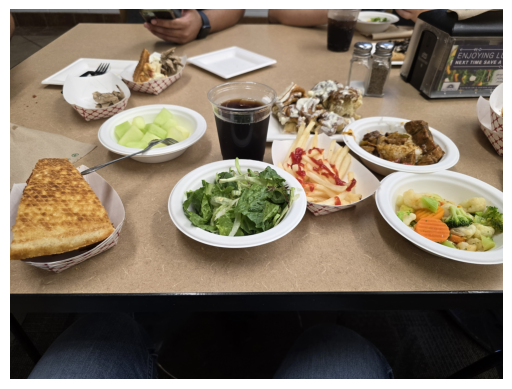

Captioning foods.jpg with model1:
[{'generated_text': 'a table topped with plates of food and drinks '}]
Captioning foods.jpg with model2:
[{'generated_text': 'a table with a variety of food on it'}]
Captioning foods.jpg with model3:
[{'generated_text': 'a table with a variety of food on it.'}]


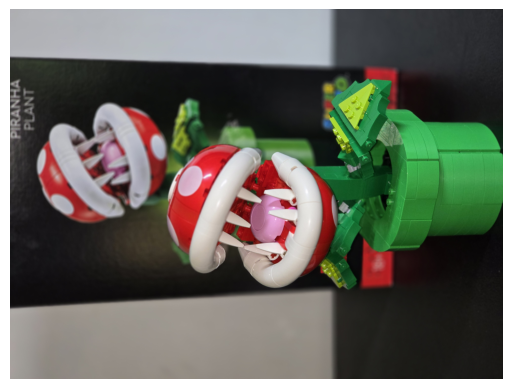

Captioning legoP.jpg with model1:
[{'generated_text': 'a toy train with a toy cow on top '}]
Captioning legoP.jpg with model2:
[{'generated_text': 'a toy with a mushroom on top of it'}]
Captioning legoP.jpg with model3:
[{'generated_text': 'elf on the shelf - -'}]


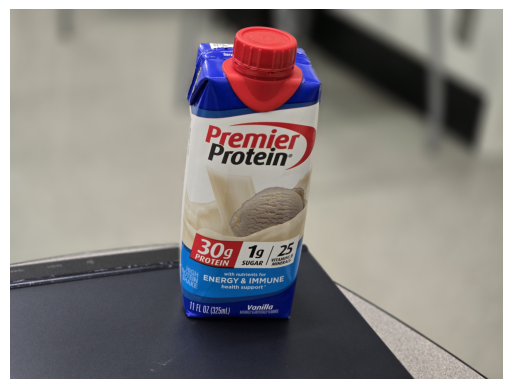

Captioning proteinS.jpg with model1:
[{'generated_text': 'a bottle of milk and a cookie on a table '}]
Captioning proteinS.jpg with model2:
[{'generated_text': 'a bottle of fr frn on a table'}]
Captioning proteinS.jpg with model3:
[{'generated_text': 'the top of a bottle of brand'}]


In [1]:
from IPython import get_ipython
from IPython.display import display
# %%
import warnings
from transformers import pipeline
from transformers.utils import logging
from PIL import Image
import matplotlib.pyplot as plt
import os

!pip install transformers==4.31.0
!pip install pillow==9.5.0

warnings.filterwarnings(action='ignore')
logging.set_verbosity(40)

models = {
    "model1": "nlpconnect/vit-gpt2-image-captioning",
    "model2": "Salesforce/blip-image-captioning-base",
    "model3": "microsoft/git-base-coco"
}

def caption_image(image_path, model_name):
    try:
        if model_name not in models:
            print(f"Error: Model '{model_name}' not found in the available models.")
            return None

        captioner = pipeline(task="image-to-text", model=models[model_name], device=0 if 'CUDA' in str(next(iter(models.values()))) else -1) # Use GPU if available

        caption = captioner(image_path)
        return caption
    except FileNotFoundError:
        print(f"Error: Image file '{image_path}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

image_files = ["foods.jpg", "legoP.jpg", "proteinS.jpg"]

for image_file in image_files:
    if os.path.exists(image_file):
        # Display the image only once per file
        image = Image.open(image_file)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        # Iterate through each model for the current image
        for model_name in models:
            print(f"Captioning {image_file} with {model_name}:")
            caption = caption_image(image_file, model_name)
            if caption:
                print(caption)
    else:
        print(f"Error: Image file '{image_file}' not found. Please upload the image to the runtime environment.")